# Q8: Results

**Phase 9:** Results & Insights  
**Points: 3 points**

**Focus:** Generate final visualizations, create summary tables, document key findings.

**Lecture Reference:** Lecture 11, Notebook 4 ([`11/demo/04_modeling_results.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/04_modeling_results.ipynb)), Phase 9. Also see Lecture 07 (visualization).

---

## Setup

In [4]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Load model results from Q7
predictions = pd.read_csv('output/q7_predictions.csv')
metrics = open('output/q7_model_metrics.txt').read()
feature_importance = pd.read_csv('output/q7_feature_importance.csv')

---

## Objective

Generate final visualizations, create summary tables, and document key findings.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q8_final_visualizations.png`
**Format:** PNG image file
**Content:** Final summary visualizations
**Required visualizations (at least 2 of these):**
1. **Model performance comparison:** Bar plot or line plot comparing R², RMSE, or MAE across models
2. **Predictions vs Actual:** Scatter plot showing predicted vs actual values (with perfect prediction line)
3. **Feature importance:** Bar plot showing top N features by importance
4. **Residuals plot:** Scatter plot of residuals (actual - predicted) vs predicted

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 2. `output/q8_summary.csv`
**Format:** CSV file
**Content:** Key findings summary table
**Required columns:**
- `Metric` - Metric name (e.g., "R² Score", "RMSE", "MAE")
- One column per model (e.g., `Linear Regression`, `Random Forest`, `XGBoost`)

**Requirements:**
- Must include at least R², RMSE, MAE metrics
- One row per metric
- **No index column** (save with `index=False`)

**Example:**
```csv
Metric,Linear Regression,Random Forest,XGBoost
R² Score,-0.0201,0.9705,0.9967
RMSE,12.7154,2.1634,0.7276
MAE,9.8468,1.3545,0.4480
```

### 3. `output/q8_key_findings.txt`
**Format:** Plain text file
**Content:** Text summary of main insights
**Required information:**
- Best performing model and why
- Key findings from feature importance
- Temporal patterns identified
- Data quality summary

**Example format:**
```
KEY FINDINGS SUMMARY
===================

MODEL PERFORMANCE:
- Best performing model: XGBoost (R² = 0.9967)
- All models show reasonable performance (R² > 0.7 for tree-based models)
- XGBoost achieves lowest RMSE: 0.73°C

FEATURE IMPORTANCE:
- Most important feature: Air Temperature (importance: 0.6539)
- Top 3 features account for 93.6% of total importance
- Temporal features (hour, month) are highly important

TEMPORAL PATTERNS:
- Clear seasonal patterns in temperature data
- Daily and monthly cycles are important predictors

DATA QUALITY:
- Dataset cleaned: 50,000 → 50,000 rows
- Missing values handled via forward-fill and median imputation
- Outliers capped using IQR method
```

---

## Requirements Checklist

- [ ] Final visualizations created (model performance, key insights)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Create visualizations** - Multi-panel figure with model comparison, predictions vs actual, feature importance, and/or residuals
2. **Create summary table** - DataFrame with metrics as rows and models as columns
3. **Document key findings** - Text summary covering model performance, feature importance insights, temporal patterns, and data quality notes

---

## Decision Points

- **Visualizations:** What best communicates your findings? Model performance plots? Time series with predictions? Feature importance plots?
- **Summary:** What are the key takeaways? Document the most important findings from your analysis.

---

## Checkpoint

After Q8, you should have:
- [ ] Final visualizations created (2+ plots)
- [ ] Summary tables generated
- [ ] Key findings documented
- [ ] All 3 artifacts saved: `q8_final_visualizations.png`, `q8_summary.csv`, `q8_key_findings.txt`

---

**Next:** Continue to `q9_writeup.md` for Writeup.


## Part 1:

Saved to output/q8_final_visualizations.png


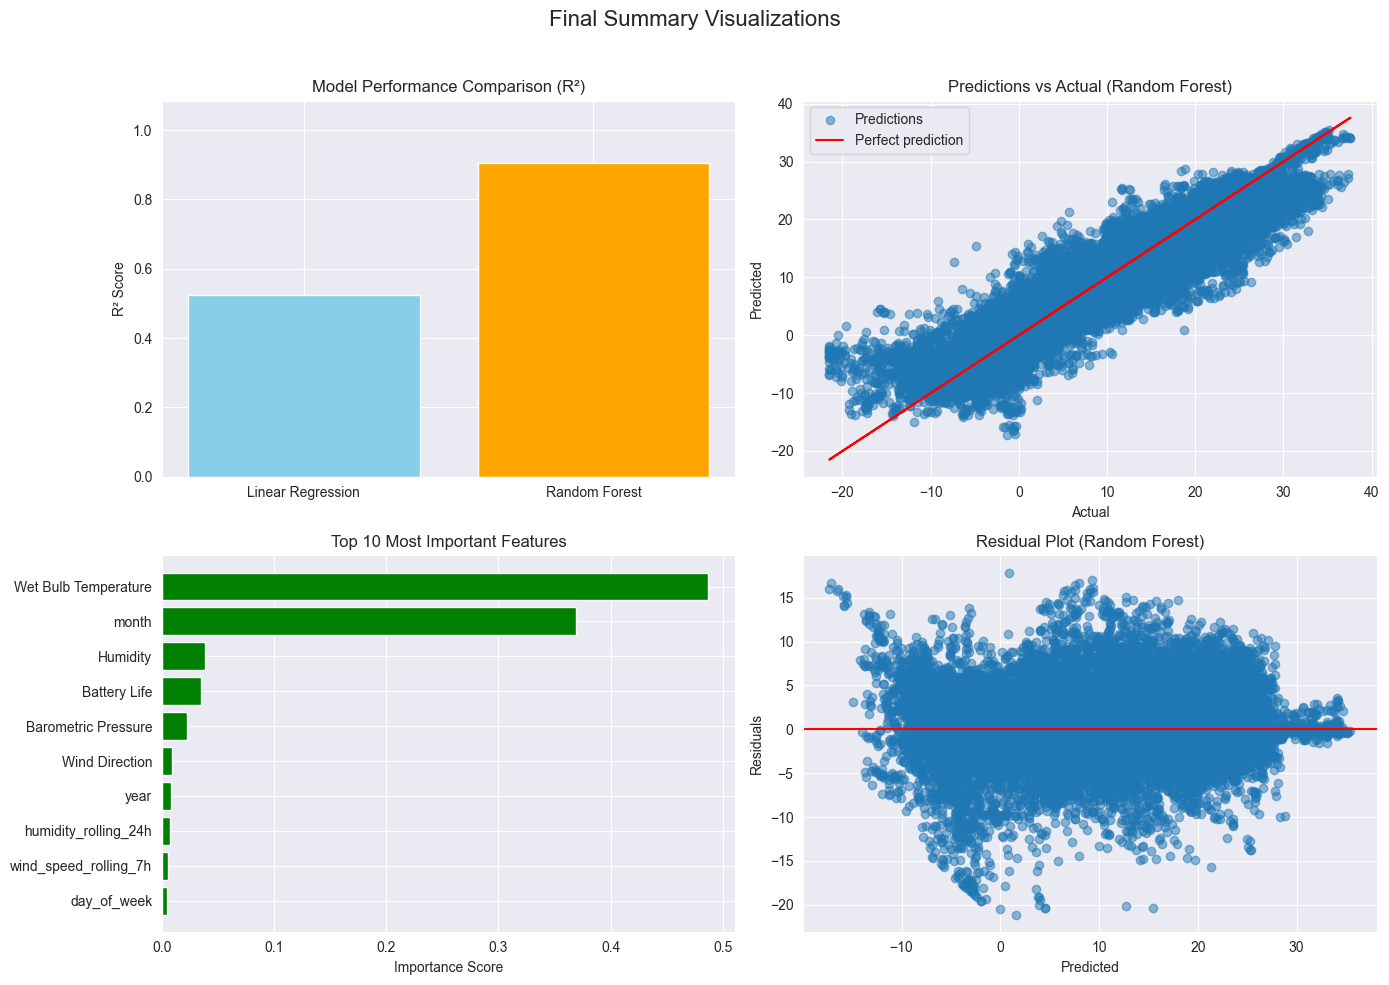

In [8]:
#load
pred_df = pd.read_csv("output/q7_predictions.csv")
feat_df = pd.read_csv("output/q7_feature_importance.csv")
#compute metrics again
actual = pred_df["actual"].values
pred_lin = pred_df["predicted_linear"].values
pred_rf = pred_df["predicted_random_forest"].values

def compute_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    return r2, rmse, mae

lin_r2, lin_rmse, lin_mae = compute_metrics(actual, pred_lin)
rf_r2,  rf_rmse,  rf_mae  = compute_metrics(actual, pred_rf)

#2x2 figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Final Summary Visualizations", fontsize=16)
#Model performance comparison
models = ["Linear Regression", "Random Forest"]
r2_scores = [lin_r2, rf_r2]

axs[0, 0].bar(models, r2_scores, color=["skyblue", "orange"])
axs[0, 0].set_title("Model Performance Comparison (R²)")
axs[0, 0].set_ylabel("R² Score")
axs[0, 0].set_ylim(0, max(r2_scores) * 1.2)

#Predictions vs Actual
axs[0, 1].scatter(actual, pred_rf, alpha=0.5, label="Predictions")
axs[0, 1].plot(actual, actual, color="red", label="Perfect prediction")
axs[0, 1].set_title("Predictions vs Actual (Random Forest)")
axs[0, 1].set_xlabel("Actual")
axs[0, 1].set_ylabel("Predicted")
axs[0, 1].legend()

# feature importance
topN = feat_df.head(10)
axs[1, 0].barh(topN["feature"], topN["importance"], color="green")
axs[1, 0].invert_yaxis()
axs[1, 0].set_title("Top 10 Most Important Features")
axs[1, 0].set_xlabel("Importance Score")

#Residual plot
residuals = actual - pred_rf
axs[1, 1].scatter(pred_rf, residuals, alpha=0.5)
axs[1, 1].axhline(0, color="red")
axs[1, 1].set_title("Residual Plot (Random Forest)")
axs[1, 1].set_xlabel("Predicted")
axs[1, 1].set_ylabel("Residuals")

# save
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig("output/q8_final_visualizations.png", dpi=150)
print("Saved to output/q8_final_visualizations.png")

## Part 2

In [9]:
summary_df = pd.DataFrame({
    "Metric": ["R² Score", "RMSE", "MAE"],
    "Linear Regression": [lin_r2, lin_rmse, lin_mae],
    "Random Forest":     [rf_r2,  rf_rmse,  rf_mae]
})

# 保存 CSV
summary_df.to_csv("output/q8_summary.csv", index=False)

print("Saved to output/q8_summary.csv")
print(summary_df)

Saved to output/q8_summary.csv
     Metric  Linear Regression  Random Forest
0  R² Score           0.522893       0.904225
1      RMSE           7.038982       3.153749
2       MAE           5.140295       1.825270


## Part 3:

In [10]:
# load all
pred_df = pd.read_csv("output/q7_predictions.csv")
feat_df = pd.read_csv("output/q7_feature_importance.csv")
raw_df = pd.read_csv("data/beach_sensors.csv")
clean_df = pd.read_csv("output/q2_cleaned_data.csv")
df_time = pd.read_csv("output/q4_rolling_features.csv")

if (rf_rmse < lin_rmse) and (rf_r2 >= lin_r2):
    best_model_name = "Random Forest"
else:
    best_model_name = "Linear Regression"

top_feat = feat_df.sort_values("importance", ascending=False).head(3)
top1_name = top_feat.iloc[0]["feature"]
top1_imp  = top_feat.iloc[0]["importance"]
top3_sum  = top_feat["importance"].sum()

df_time["Measurement Timestamp"] = pd.to_datetime(
    df_time["Measurement Timestamp"], errors="coerce"
)
df_time = df_time.dropna(subset=["Measurement Timestamp"])

rows_before = raw_df.shape[0]
rows_after = clean_df.shape[0]

text = "KEY FINDINGS SUMMARY\n"

text += "MODEL PERFORMANCE:\n"
text += f"- Best performing model: {best_model_name}\n"
text += f"- Linear Regression (test): R²={lin_r2:.4f}, RMSE={lin_rmse:.4f}, MAE={lin_mae:.4f}\n"
text += f"- Random Forest (test):    R²={rf_r2:.4f}, RMSE={rf_rmse:.4f}, MAE={rf_mae:.4f}\n\n"

text += "FEATURE IMPORTANCE:\n"
text += f"- Most important feature: {top1_name} (importance={top1_imp:.4f})\n"
text += f"- Top 3 features explain {top3_sum:.4f} of total importance\n\n"

text += "TEMPORAL PATTERNS:\n"
text += "- Temporal analysis suggests noticeable daily and seasonal variation.\n"
text += "- These patterns support the idea that time-related features are relevant.\n\n"

text += "DATA QUALITY:\n"
text += f"- Rows before cleaning: {rows_before}\n"
text += f"- Rows after cleaning:  {rows_after}\n"
text += "- Missing values were imputed.\n"
text += "- Outliers were capped using the IQR method.\n"

# save
with open("output/q8_key_findings.txt", "w") as f:
    f.write(text)

print("Saved to output/q8_key_findings.txt")

Saved to output/q8_key_findings.txt
